# 1. 선 그래프 (Line plot) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x와 y의 원소개수는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

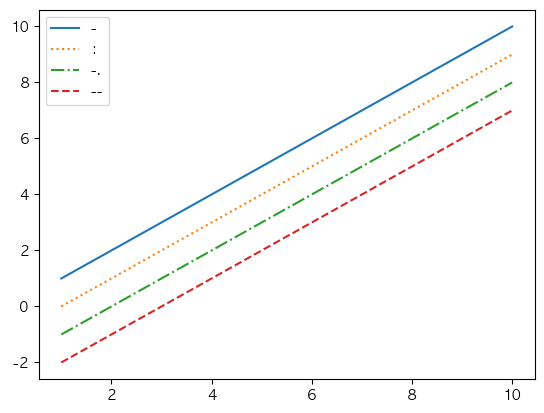

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 10, num=100)  # 1 ~ 10까지 같은 간격으로 떨어진 100개의 실수를 반환

# 선그래프 - plot(x, y)
plt.plot(x, x, label='-')
plt.plot(x, x-1, linestyle=':', label=':')  # x-1 : 원소단위 계산(모든 원소들의 값 - 1)
plt.plot(x, x-2, linestyle='-.', label='-.')
plt.plot(x, x-3, linestyle='--', label='--')

plt.legend()
plt.show()

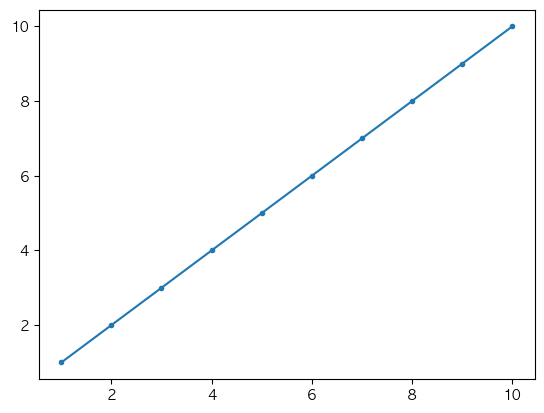

In [19]:
l = np.linspace(1, 10, 10)

plt.plot(l, l, marker = '.')
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')

In [32]:
df.rename(columns={df.columns[-1]:'최대농도'}, inplace=True)

In [33]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


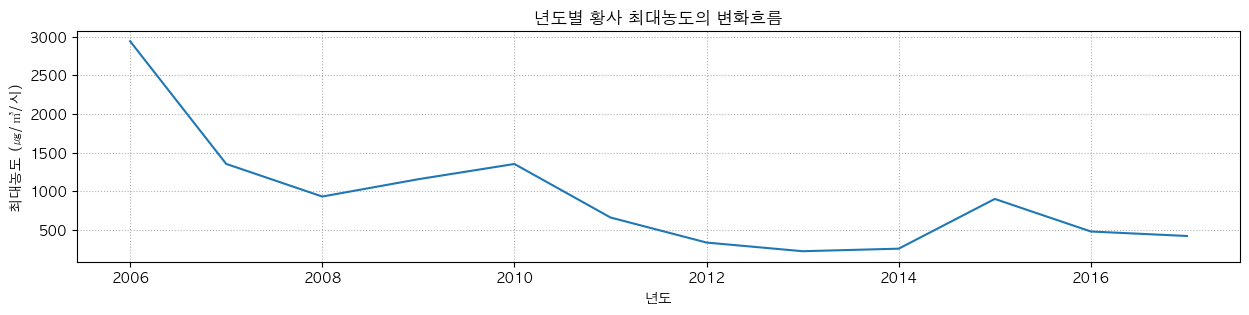

In [40]:
# 년도에 따른 황사 최대농도의 변화흐름
## x축: 변화흐름의 기준값들(년도), y축: 변화량 값(최대 농도)
plt.figure(figsize=(15,3))
plt.plot(df['년도'], # x축 값
         df['최대농도'], # y축 값
        )

plt.title('년도별 황사 최대농도의 변화흐름')
plt.xlabel('년도')
plt.ylabel('최대농도 (㎍/㎥/시)')
plt.grid(True, linestyle=':')
plt.show()

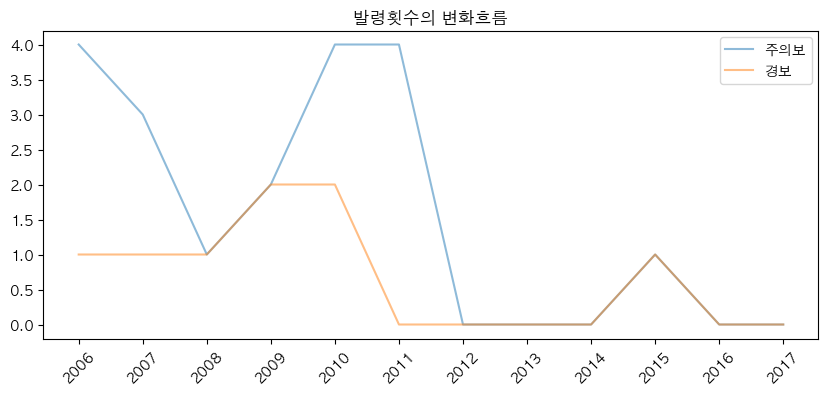

In [49]:
# 년도에 따른 주의보/경보 발령횟수의 변화흐름을 비교
plt.figure(figsize=(10, 4))

# 겹치는 부분을 다 보고싶은 경우 alpha를 조절 (모든 plot의 공통 파라미터)
plt.plot(df['년도'], df['주의보 발령횟수'], label='주의보', alpha=0.5)
plt.plot(df['년도'], df['경보 발령횟수'], label='경보', alpha=0.5)

plt.title('발령횟수의 변화흐름')
plt.xticks(ticks=df['년도'], 
           fontsize=10,
           rotation=45
          )

plt.legend()
plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

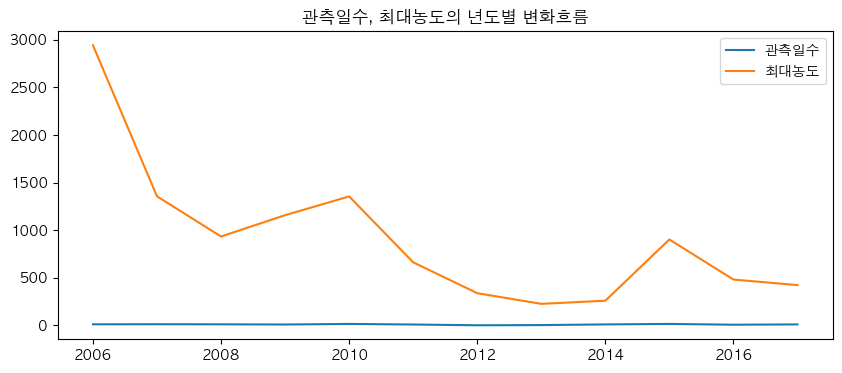

In [60]:
plt.figure(figsize=(10, 4))

plt.plot(df['년도'], df['관측일수'], label='관측일수')
plt.plot(df['년도'], df['최대농도'], label='최대농도')

plt.title('관측일수, 최대농도의 년도별 변화흐름')
plt.legend()
plt.show()

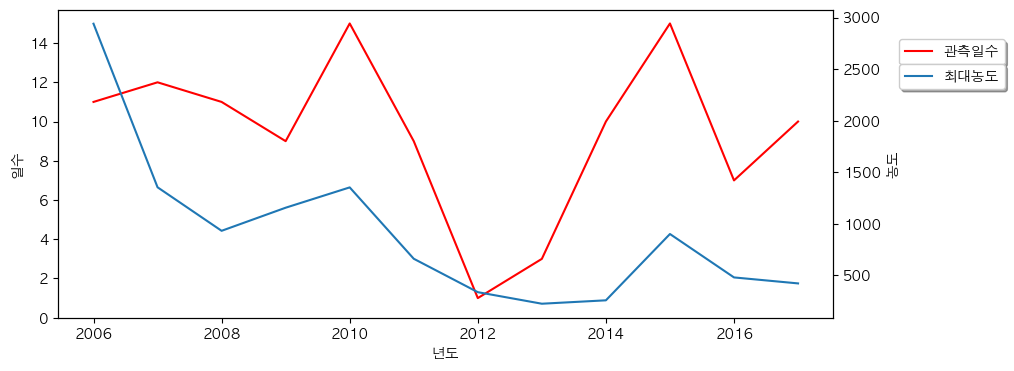

In [92]:
plt.figure(figsize=(10, 4))
ax1 = plt.gca()
ax2 = ax1.twinx()  # ax1과 x축을 공유하면서 오른쪽 spine이 y츅인 axes를 생성

ax1.plot(df['년도'], df['관측일수'], color='red', label='관측일수')
ax2.plot(df['년도'], df['최대농도'], label='최대농도')

# x축의 label
ax1.set_xlabel('년도')
# y축의 label
ax1.set_ylabel('일수')
ax2.set_ylabel('농도')

# 일수 ticks 조정
ax1.set_yticks(range(0, 16, 2))


# ax1.legend(loc='upper center')  # 안쪽 9개 영역의 위치 중 하나를 잡아주기 loc="상하위치 좌우위치"
# ax2.legend(loc='lower left')

ax1.legend(bbox_to_anchor=(1.23, 0.8), loc='lower right', shadow=True)
ax2.legend(bbox_to_anchor=(1.23, 0.72), loc='lower right', shadow=True)

# bbox: legend box
# anchor: 위치
# bbox_to_anchor=(x좌표, y좌표)
# 0 ~ 1 기준으로 위치를 지정 (x/y축의 시작: 0, x/y축의 끝: 1)
# loc: bbox의 어느 지점을 anchor 점에 맞출 것인지 지정

plt.show()

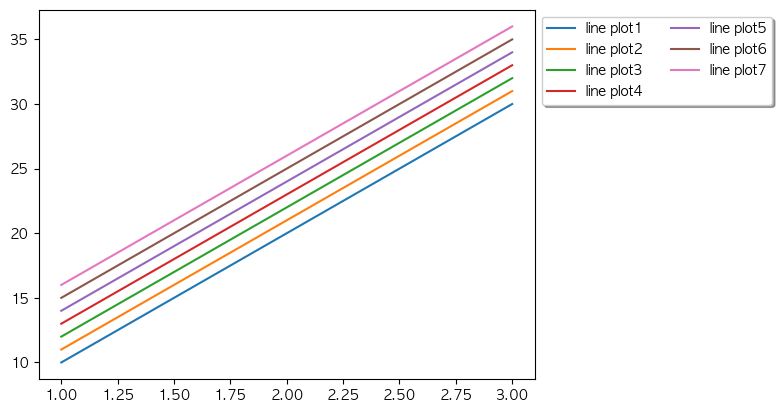

In [101]:
## legend box 설정
plt.plot([1, 2, 3], np.array([10, 20, 30]), label='line plot1')
plt.plot([1, 2, 3], np.array([10, 20, 30])+1, label='line plot2')
plt.plot([1, 2, 3], np.array([10, 20, 30])+2, label='line plot3')
plt.plot([1, 2, 3], np.array([10, 20, 30])+3, label='line plot4')
plt.plot([1, 2, 3], np.array([10, 20, 30])+4, label='line plot5')
plt.plot([1, 2, 3], np.array([10, 20, 30])+5, label='line plot6')
plt.plot([1, 2, 3], np.array([10, 20, 30])+6, label='line plot7')

plt.legend(fontsize=10,
           ncol=2,  # 지정한 열수에 나눠서 출력
           bbox_to_anchor=(1.0, 1),
           loc='upper left',
           shadow=True
          )
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x축 값, 2번인수 y축 값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
        - x와 y의 원소의 수는 같아야 한다.
    - c/color: 색지정
        - c와 x, y와 같은 원소수를 가지는 Iterable 타입 객체로 설정할 경우 각 마커마다 다른 색상을 설정할 수 있다
    - s: 점 크기 지정
        

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
x = range(1, 1001, 50)
y = range(1, 1001, 50)
y2 = range(1000, 0, -50)

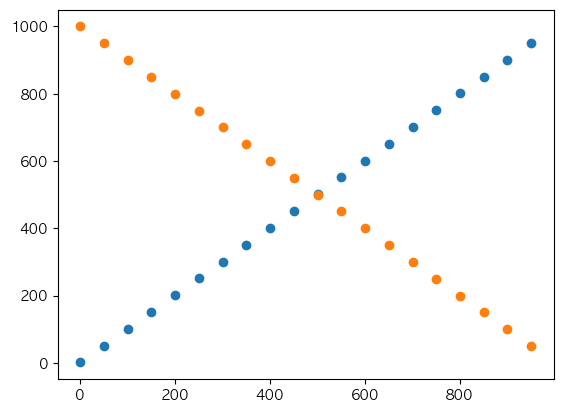

In [105]:
plt.scatter(x, y)
plt.scatter(x, y)
plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 정수: 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

In [107]:
np.random.randint(1, 5, 30)  # 랜덤값: 1 ~ 5 사이 정수 30개

array([2, 3, 1, 1, 4, 2, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 3, 2, 3, 4, 4, 4,
       2, 4, 2, 4, 3, 4, 4, 1])

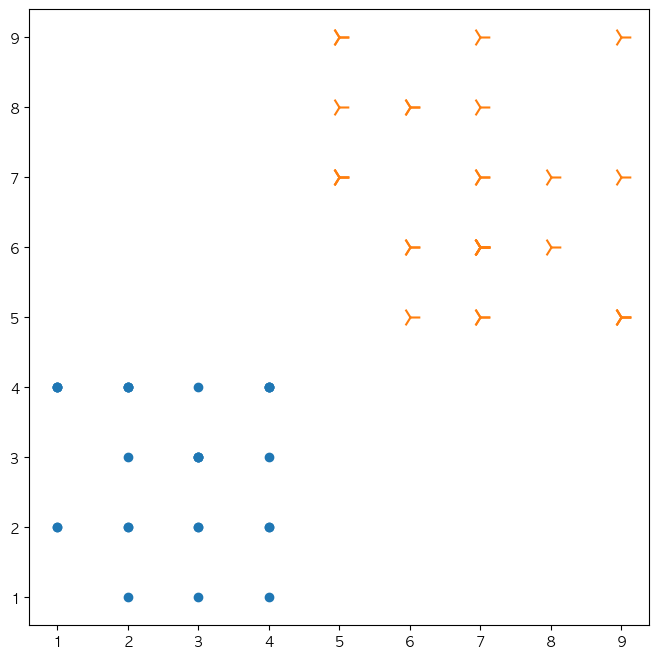

In [110]:
plt.figure(figsize=(8, 8))
plt.scatter(x=np.random.randint(1, 5, 30),
            y=np.random.randint(1, 5, 30))

plt.scatter(x=np.random.randint(5, 10, 30),
            y=np.random.randint(5, 10, 30),
            marker='4',
            s=200)

plt.show()

## 2.3 산점도 활용

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv('data/diamonds.csv')
df.shape

(53940, 10)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


###  캐럿(carat)과 가격(Price)간의 상관관계 시각화

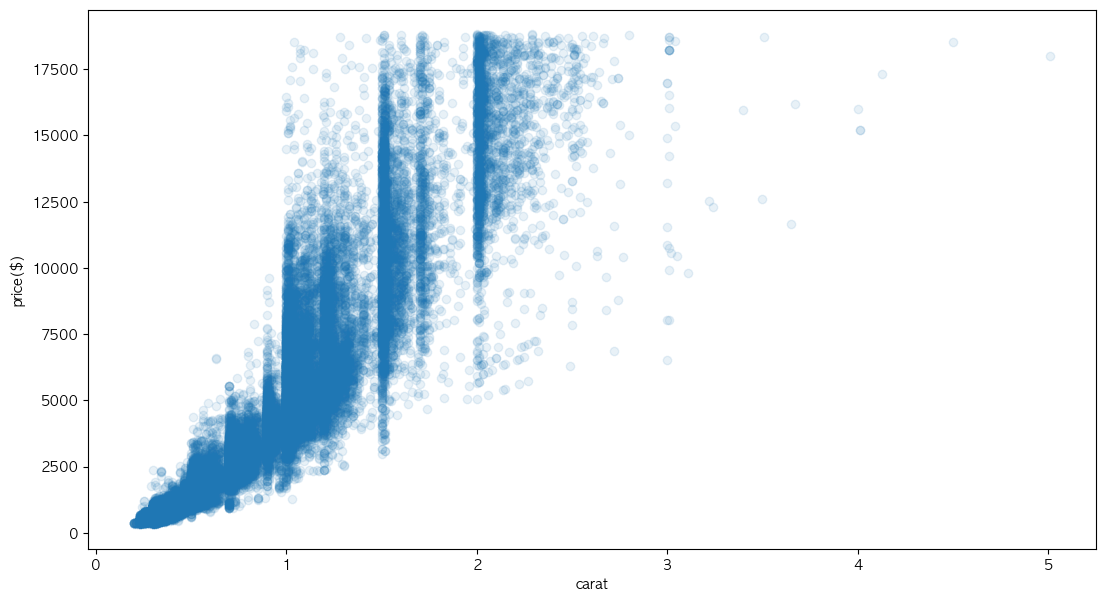

In [119]:
plt.figure(figsize=(13, 7))

plt.scatter(df['carat'], df['price'], alpha=0.1)  # x, y 연속형 값 -> 상관관계(비례, 반비례)를 시각적으로 확인
plt.xlabel('carat')
plt.ylabel('price($)')
plt.show()

> - 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - 양수: 양의 상관관계(비례관계), 음수: 음의 상관관계(반비례관계)
>             - 양: 0 ~ 1,  음: -1 ~ 0
>         - 절대값 기준 1로 갈수록 강한상관관계, 0으로 갈수록 약한 상관관계
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

In [121]:
# 상관계수 계산
## numpy의 함수
import numpy as np
r = np.corrcoef(df['price'], df['carat'])
r

array([[1.       , 0.9215913],
       [0.9215913, 1.       ]])

In [122]:
pd.DataFrame(r, index=['price', 'carat'], columns=['price', 'carat'])

,price,carat
price,1.000000,0.921591
carat,0.921591,1.000000


In [123]:
## pandas - dataframe
df[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


In [126]:
df[['carat', 'price', 'depth', 'x', 'y', 'z']].corr()

,carat,price,depth,x,y,z
carat,1.000000,0.921591,0.028224,0.975094,0.951722,0.953387
price,0.921591,1.000000,-0.010647,0.884435,0.865421,0.861249
depth,0.028224,-0.010647,1.000000,-0.025289,-0.029341,0.094924
x,0.975094,0.884435,-0.025289,1.000000,0.974701,0.970772
y,0.951722,0.865421,-0.029341,0.974701,1.000000,0.952006
z,0.953387,0.861249,0.094924,0.970772,0.952006,1.000000


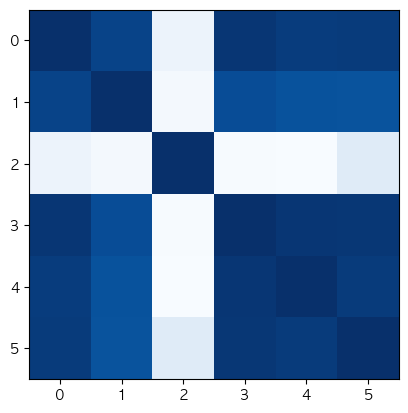

In [129]:
plt.imshow(df[['carat', 'price', 'depth', 'x', 'y', 'z']].corr(), cmap='blues')
plt.show()

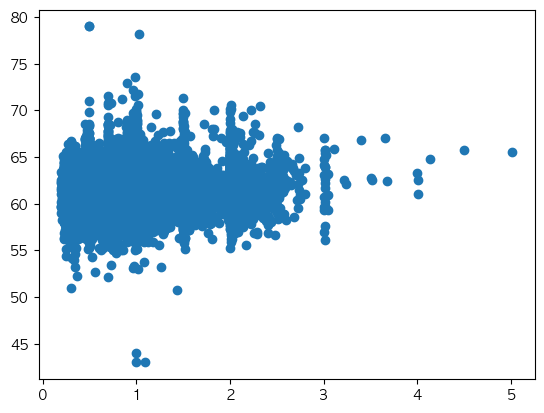

In [130]:
plt.scatter(df['carat'], df['depth'])
plt.show()

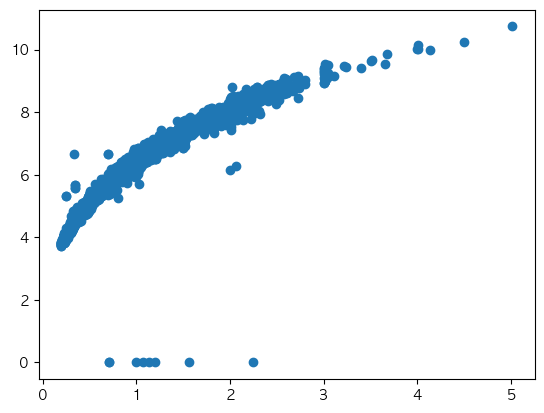

In [131]:
plt.scatter(df['carat'], df['x'])
plt.show()

# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

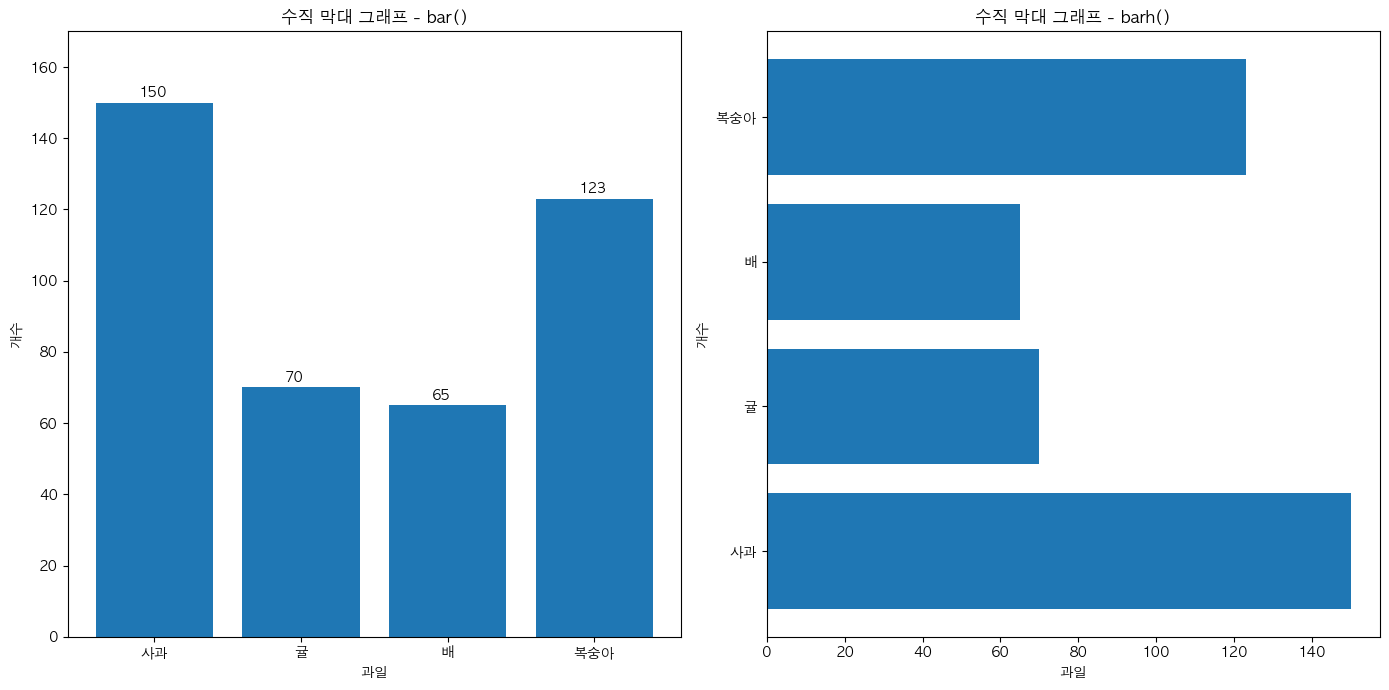

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fruit = ['사과', '귤', '배', '복숭아']
amount = [150, 70, 65, 123]
# 막대그래프 데이터 - 분류값들 개수들
plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.bar(fruit, amount)   #(x=ftuit, height=amount)
plt.title('수직 막대 그래프 - bar()')
plt.xlabel('과일')
plt.ylabel('개수')
# 개수를 막대 위체 text로 표시
for x, y in enumerate(amount):  # (0, 150), (1, 70), ...
    plt.text(x-0.11, y+1.5, str(y))

# y축의 범위를 변경
plt.ylim(0, 170)
# plt.xlim(0, 7)  # x축의 범위를 변경

plt.subplot(1, 2, 2)
plt.barh(fruit, amount)   #(x=ftuit, height=amount)
plt.title('수직 막대 그래프 - barh()')
plt.xlabel('과일')
plt.ylabel('개수')

plt.tight_layout()
plt.show()

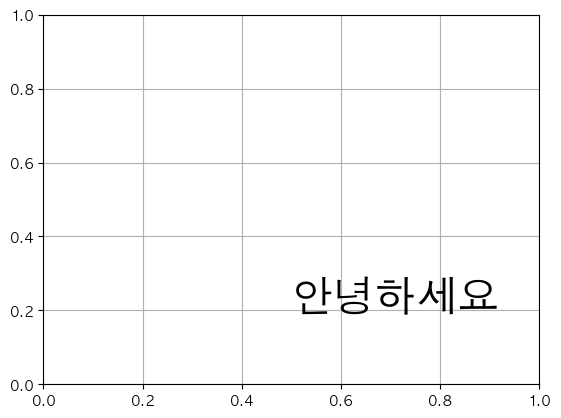

In [141]:
# axes에 글씨 쓰기
plt.text(0.5,  # 글씨를 쓸 x좌표 
         0.2,  # 글씨를 쓸 y좌표
         '안녕하세요', # 문자열
         fontsize=30
        )
plt.grid(True)
plt.show()

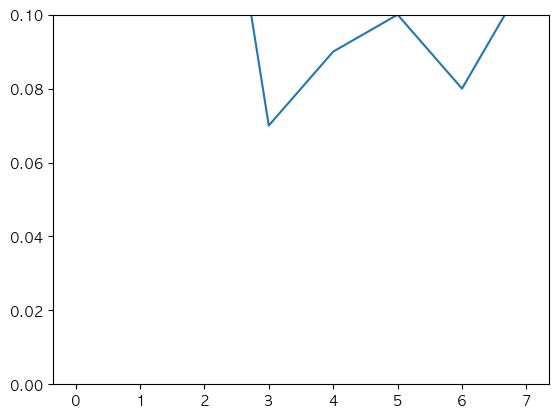

In [152]:
# 급격한 값의 변화때문에 작은 변화가 안보일 경우 범위를 줄여준다
a = [1, 0.1, 0.18, 0.07, 0.09, 0.1, 0.08, 0.11]
plt.plot(range(8), a)
plt.ylim(0, 0.1)
plt.show()

In [154]:
# 범주형 컬럼의 빈도수를 시각화
v = df['color'].value_counts()
v

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

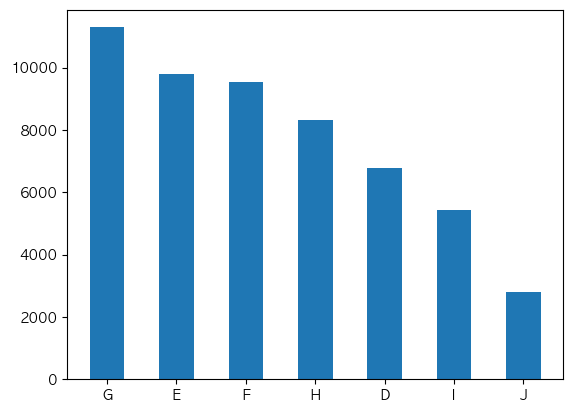

In [162]:
plt.bar(v.index, v, width=0.5)
plt.show()

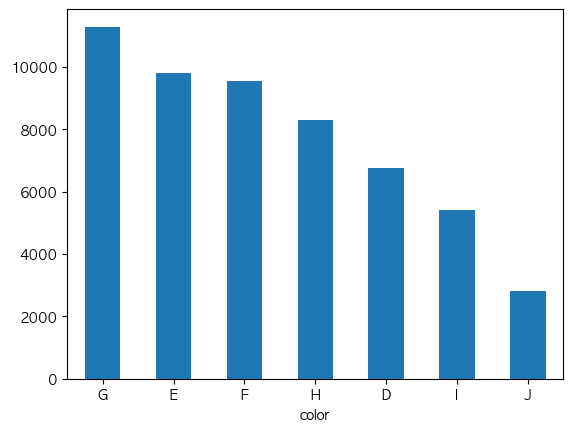

In [159]:
v.plot(kind='bar', rot=0);

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)

In [166]:
import pandas as pd
df = pd.read_excel('data/강수량.xlsx')
df.set_index('계절', inplace=True)

In [167]:
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


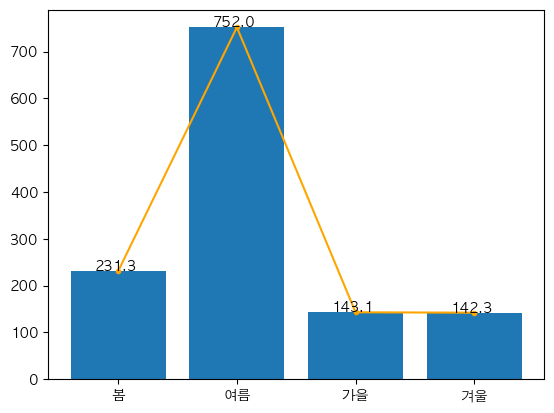

In [176]:
# 2009년 계절별 강수량 크기 비교
plt.bar(df.index, df[2009])  # 양적 비교
plt.plot(df.index, df[2009], color='orange', marker='.')  # 변화 흐름
for i, y in enumerate(df[2009]):
    plt.text(i-0.2, y+0.8, str(y))
plt.show()